In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

In [2]:
trainimagelist=[]
traincategorylist=[]
a=0
name=["angry","disgust","fear","happy","neutral","sad","surprise"]
for i in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\train"):
    count=0
    path=os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\train",i)
    for j in os.listdir(path):
        if count==400:
            break
        imagepath=os.path.join(path,j)
        trainimagelist.append(imagepath)
        traincategorylist.append(name[a])
        count+=1
    a+=1



In [3]:
len(traincategorylist)

2800

In [4]:
valimagelist=[]
valcategorylist=[]
a=0
name=["angry","disgust","fear","happy","neutral","sad","surprise"]
for i in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\test"):
    count=0
    path=os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\test",i)
    for j in os.listdir(path):
        if count==100:
            break
        imagepath=os.path.join(path,j)
        valimagelist.append(imagepath)
        valcategorylist.append(name[a])
        count+=1
    a+=1

In [5]:
len(valcategorylist)

700

In [6]:
testimagelist=[]
testcategorylist=[]
a=0
name=["angry","disgust","fear","happy","neutral","sad","surprise"]
for i in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\test"):
    count=0
    path=os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\archive\test",i)
    for j in os.listdir(path):
        if count>100 and count<200:
            imagepath=os.path.join(path,j)
            testimagelist.append(imagepath)
            testcategorylist.append(name[a])
        count+=1
    a+=1

In [7]:
len(testcategorylist)

604

In [8]:
trainimg=[]
for i in trainimagelist:
    imge=Image.open(i)
    imge=imge.resize((224,224))
    imgearray=np.array(imge)
    imgearray=imgearray/225.0
    trainimg.append(imgearray)

In [9]:
valimg=[]
for i in valimagelist:
    imge=Image.open(i)
    imge=imge.resize((224,224))
    imgearray=np.array(imge)
    imgearray=imgearray/225.0
    valimg.append(imgearray)

In [10]:
testimg=[]
for i in testimagelist:
    imge=Image.open(i)
    imge=imge.resize((224,224))
    imgearray=np.array(imge)
    imgearray=imgearray/225.0
    testimg.append(imgearray)

In [11]:
traindf=pd.DataFrame({"X":trainimg})
valdf=pd.DataFrame({"X":valimg})
testdf=pd.DataFrame({"X":testimg})

In [12]:
cl=pd.Series(traincategorylist)
tay=pd.get_dummies(cl,dtype=float)

cl=pd.Series(valcategorylist)
vay=pd.get_dummies(cl,dtype=float)

cl=pd.Series(testcategorylist)
tey=pd.get_dummies(cl,dtype=float)

In [13]:
tey.shape

(604, 7)

In [14]:
traindf=pd.concat([traindf,tay],axis=1)
valdf=pd.concat([valdf,vay],axis=1)
testdf=pd.concat([testdf,tey],axis=1)

In [15]:
traindf_final=traindf.sample(frac=1, random_state=42)
testdf_final=testdf.sample(frac=1,random_state=42)
valdf_final=valdf.sample(frac=1,random_state=42)

In [16]:
tax=np.stack(traindf_final['X'].values)
tax = np.expand_dims(tax, axis=-1)
tay=traindf[["angry","disgust","fear","happy","neutral","sad","surprise"]].values 


In [17]:
vax=np.stack(valdf_final['X'].values)
vax = np.expand_dims(vax, axis=-1) 
vay=valdf[["angry","disgust","fear","happy","neutral","sad","surprise"]].values 

In [18]:
tsx=np.stack(testdf_final['X'].values)
tsx = np.expand_dims(tsx, axis=-1)
tsy=testdf[["angry","disgust","fear","happy","neutral","sad","surprise"]].values  

In [20]:
tax.shape

(2800, 224, 224, 1)

In [19]:
tay.shape

(2800, 7)

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Dense(7,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 69s 761ms/step - accuracy: 0.1551 - loss: 2.0318 - val_accuracy: 0.1457 - val_loss: 2.1630
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 65s 743ms/step - accuracy: 0.1851 - loss: 1.9411 - val_accuracy: 0.1443 - val_loss: 1.9953
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 67s 762ms/step - accuracy: 0.1757 - loss: 1.9389 - val_accuracy: 0.1414 - val_loss: 3.7146
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 75s 853ms/step - accuracy: 0.2559 - loss: 1.8685 - val_accuracy: 0.1429 - val_loss: 2.3914
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 790ms/step - accuracy: 0.3619 - loss: 1.6663 - val_accuracy: 0.1243 - val_loss: 2.0887


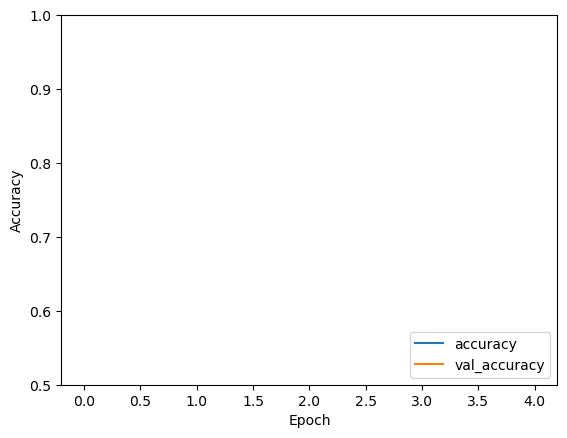

In [30]:
history = model.fit(tax,tay, epochs=5,validation_data=(vax, vay))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')